In [25]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Dropout, LSTM , Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

In [26]:
num_words = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [27]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [28]:
print(f'Size of Images is : {len(X_train[1])}x{len(X_train[2])}')

Size of Images is : 189x141


In [29]:
len(X_train)

25000

In [30]:
len(X_test)

25000

In [31]:
X_train.shape

(25000,)

In [32]:
X_test.shape

(25000,)

In [33]:
np.argmin(X_train[0])

0

In [34]:
np.argmax(X_train[0])

141

In [35]:
max_value = np.max(X_train[0])

In [36]:
max_value

31050

In [37]:
max_review_length = 250
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [38]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
train_history = model.fit(X_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)

Epoch 1/10
625/625 - 9s - 14ms/step - accuracy: 0.7951 - loss: 0.4310 - val_accuracy: 0.8514 - val_loss: 0.3397
Epoch 2/10
625/625 - 10s - 16ms/step - accuracy: 0.8680 - loss: 0.3158 - val_accuracy: 0.8366 - val_loss: 0.3664
Epoch 3/10
625/625 - 6s - 10ms/step - accuracy: 0.8814 - loss: 0.2892 - val_accuracy: 0.8658 - val_loss: 0.3345
Epoch 4/10
625/625 - 11s - 17ms/step - accuracy: 0.8890 - loss: 0.2671 - val_accuracy: 0.8704 - val_loss: 0.3126
Epoch 5/10
625/625 - 11s - 17ms/step - accuracy: 0.8997 - loss: 0.2460 - val_accuracy: 0.8712 - val_loss: 0.3175
Epoch 6/10
625/625 - 10s - 16ms/step - accuracy: 0.9075 - loss: 0.2308 - val_accuracy: 0.8648 - val_loss: 0.3651
Epoch 7/10
625/625 - 10s - 15ms/step - accuracy: 0.9134 - loss: 0.2160 - val_accuracy: 0.8706 - val_loss: 0.3383
Epoch 8/10
625/625 - 7s - 11ms/step - accuracy: 0.9171 - loss: 0.2083 - val_accuracy: 0.8582 - val_loss: 0.3310
Epoch 9/10
625/625 - 11s - 17ms/step - accuracy: 0.9262 - loss: 0.1862 - val_accuracy: 0.8626 - val

In [40]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

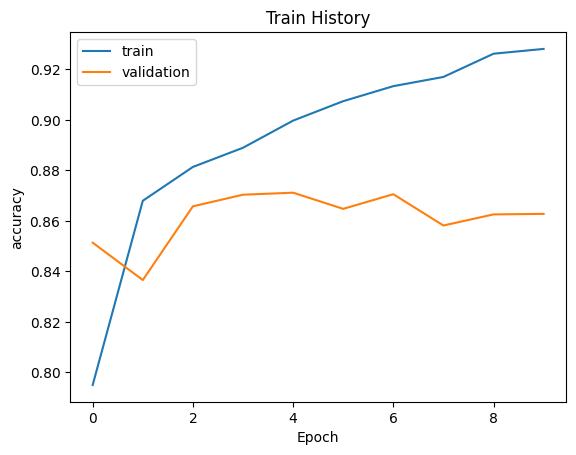

In [41]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

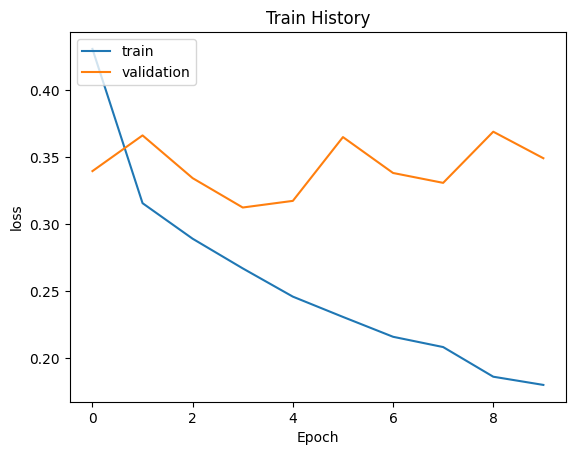

In [42]:
show_train_history(train_history,'loss','val_loss')

In [43]:
scores = model.evaluate(X_test, y_test, verbose=1)
scores[1]

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8600 - loss: 0.3578


0.8619599938392639